In [9]:
import networkx as nx
import numpy as np

import qcopt

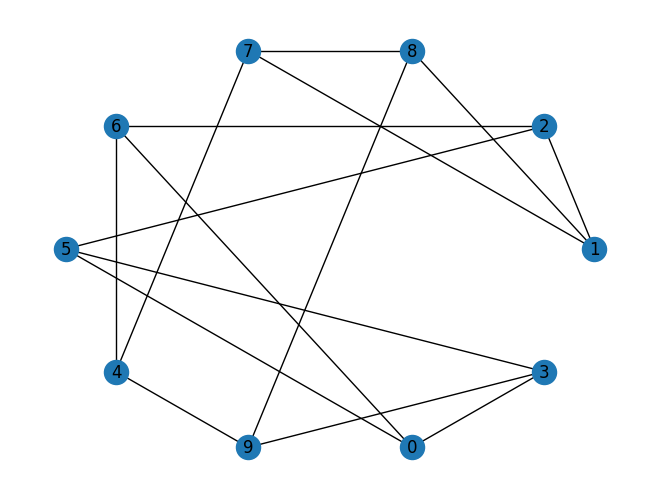

In [5]:
G = qcopt.graph_funcs.graph_from_file('benchmark_graphs/N10_d3_graphs/G1.txt')
nx.draw_circular(G, with_labels=True)

In [13]:
len(G)

10

In [20]:
# you can turn individual_partial_mixers on or off to change whether the mixer is parameterized by 1 or many angles
# I usually use this circuit or the qlsa circuit (see below)
qaoa_circuit = qcopt.qao_ansatz.gen_qaoa(
    G=G,
    P=1,
    mixer_order=None,
    params=np.arange(1,len(G)+2,1), # need 1 angle for each mixer (= number of nodes) plus 1 more for the phase separate Rz rotations
    init_state='0'*len(G.nodes),
    individual_partial_mixers=True,
    barriers=1,
    decompose_toffoli=0
)
qaoa_circuit.draw(fold=-1)

░ ┌───────┐                                                                                        ░ ┌────────┐ ░ 
q_0: ─░─┤ Rx(2) ├──────────────────────o──────────────────o─────────o────────────────────────────────────░─┤ Rz(22) ├─░─
      ░ └───┬───┘┌───────┐             │                  │         │                                    ░ ├────────┤ ░ 
q_1: ─░─────┼────┤ Rx(4) ├────o────────┼──────────────────┼─────────┼─────────o─────────o────────────────░─┤ Rz(22) ├─░─
      ░     │    └───┬───┘┌───┴───┐    │                  │         │         │         │                ░ ├────────┤ ░ 
q_2: ─░─────┼────────o────┤ Rx(6) ├────┼──────────────────o─────────o─────────┼─────────┼────────────────░─┤ Rz(22) ├─░─
      ░     │        │    └───┬───┘┌───┴───┐              │         │         │         │                ░ ├────────┤ ░ 
q_3: ─░─────o────────┼────────┼────┤ Rx(8) ├──────────────o─────────┼─────────┼─────────┼─────────o──────░─┤ Rz(22) ├─░─
      ░     │        │        │    └───┬───┘┌────────┐    │         │         │         │         │      ░ ├────────┤ ░ 
q_4: ─░─────┼────────┼────────┼────────┼────┤ Rx(10) ├────┼─────────o─────────o─────────┼─────────o──────░─┤ Rz(22) ├─░─
      ░     │        │        │        │    └───┬────┘┌───┴────┐    │         │         │         │      ░ ├────────┤ ░ 
q_5: ─░─────o────────┼────────o────────o────────┼─────┤ Rx(12) ├────┼─────────┼─────────┼─────────┼──────░─┤ Rz(22) ├─░─
      ░     │        │        │        │        │     └────────┘┌───┴────┐    │         │         │      ░ ├────────┤ ░ 
q_6: ─░─────o────────┼────────o────────┼────────o───────────────┤ Rx(14) ├────┼─────────┼─────────┼──────░─┤ Rz(22) ├─░─
      ░              │                 │        │               └────────┘┌───┴────┐    │         │      ░ ├────────┤ ░ 
q_7: ─░──────────────o─────────────────┼────────o─────────────────────────┤ Rx(16) ├────o─────────┼──────░─┤ Rz(22) ├─░─
      ░              │                 │        │                         └───┬────┘┌───┴────┐    │      ░ ├────────┤ ░ 
q_8: ─░──────────────o─────────────────┼────────┼─────────────────────────────o─────┤ Rx(18) ├────o──────░─┤ Rz(22) ├─░─
      ░                                │        │                                   └───┬────┘┌───┴────┐ ░ ├────────┤ ░ 
q_9: ─░────────────────────────────────o────────o───────────────────────────────────────o─────┤ Rx(20) ├─░─┤ Rz(22) ├─░─
      ░                                                                                       └────────┘ ░ └────────┘ ░

In [24]:
# basically the same circuit as qaoa, but turns off partial mixers where init_state=1,
# however it always keeps the total number of partial mixers, so the extras are added after the phase separator
dqva_circuit = qcopt.dqva.gen_dqva(
    G=G,
    P=1,
    mixer_order=None,
    params=np.arange(1,len(G)+2,1), # need 1 angle for each mixer (= number of nodes) plus 1 more for the phase separate Rz rotations
    init_state='0000100101',
    barriers=1,
    decompose_toffoli=0
)
dqva_circuit.draw(fold=-1)

┌───┐ ░                                                                    ░ ┌────────┐ ░                                ░ 
q_0: ┤ X ├─░────────────────────────────────o────────────────────────────o──────░─┤ Rz(16) ├─░────────────────────────────────░─
     └───┘ ░ ┌───────┐                      │                            │      ░ ├────────┤ ░ ┌────────┐                     ░ 
q_1: ──────░─┤ Rx(2) ├────o────────o────────┼────────────────────────────┼──────░─┤ Rz(16) ├─░─┤ Rx(18) ├────o─────────o──────░─
     ┌───┐ ░ └───┬───┘    │        │        │                            │      ░ ├────────┤ ░ └───┬────┘    │         │      ░ 
q_2: ┤ X ├─░─────o────────┼────────┼────────o────────────────────────────┼──────░─┤ Rz(16) ├─░─────o─────────┼─────────┼──────░─
     └───┘ ░     │        │        │        │                        ┌───┴────┐ ░ ├────────┤ ░     │         │         │      ░ 
q_3: ──────░─────┼────────┼────────┼────────┼──────────────────o─────┤ Rx(14) ├─░─┤ Rz(16) ├─░─────┼─────────┼─────────┼──────░─
           ░     │        │        │        │    ┌────────┐    │     └───┬────┘ ░ ├────────┤ ░     │         │         │      ░ 
q_4: ──────░─────┼────────┼────────o────────o────┤ Rx(10) ├────o─────────┼──────░─┤ Rz(16) ├─░─────┼─────────┼─────────o──────░─
     ┌───┐ ░     │        │        │        │    └───┬────┘    │         │      ░ ├────────┤ ░     │         │         │      ░ 
q_5: ┤ X ├─░─────┼────────┼────────┼────────┼────────┼─────────┼─────────o──────░─┤ Rz(16) ├─░─────┼─────────┼─────────┼──────░─
     └───┘ ░     │        │        │    ┌───┴───┐    │         │         │      ░ ├────────┤ ░     │         │         │      ░ 
q_6: ──────░─────┼────────┼────────┼────┤ Rx(8) ├────o─────────┼─────────┼──────░─┤ Rz(16) ├─░─────┼─────────┼─────────┼──────░─
           ░     │        │    ┌───┴───┐└───────┘    │         │         │      ░ ├────────┤ ░     │         │     ┌───┴────┐ ░ 
q_7: ──────░─────o────────o────┤ Rx(6) ├─────────────o─────────┼─────────┼──────░─┤ Rz(16) ├─░─────o─────────o─────┤ Rx(22) ├─░─
           ░     │    ┌───┴───┐└───┬───┘             │         │         │      ░ ├────────┤ ░     │     ┌───┴────┐└───┬────┘ ░ 
q_8: ──────░─────o────┤ Rx(4) ├────o─────────────────┼─────────o─────────┼──────░─┤ Rz(16) ├─░─────o─────┤ Rx(20) ├────o──────░─
           ░          └───┬───┘                      │     ┌───┴────┐    │      ░ ├────────┤ ░           └───┬────┘           ░ 
q_9: ──────░──────────────o──────────────────────────o─────┤ Rx(12) ├────o──────░─┤ Rz(16) ├─░───────────────o────────────────░─
           ░                                               └────────┘           ░ └────────┘ ░                                ░

In [28]:
# qlsa circuit, the name is because I wrote this code when we wrote our "Quantum Local Search Ansatz" paper
# I use this circuit when I want to turn some of the partial mixers off, but don't want added after the phase separator
# In the paper you linked, this is the circuit that is referred to as "DQVA"
num_params = 6 + 1 # 5 partial mixers + 1 phase separator angle
qlsa_circuit = qcopt.qlsa.gen_qlsa(
    G=G,
    P=1,
    mixer_order=None,
    params=np.arange(1,num_params+1),
    init_state='0'*len(G),
    barriers=1,
    decompose_toffoli=0,
    param_lim=num_params, # this controls number of mixers, have to remember to add 1 angle for the phase separator
)
qlsa_circuit.draw(fold=-1)

░                                                           ░ ┌───────┐ ░ 
q_0: ─░──────────────────────────────────────────o─────────o──────░─┤ Rz(2) ├─░─
      ░ ┌───────┐                                │         │      ░ ├───────┤ ░ 
q_1: ─░─┤ Rx(4) ├────o────────o────────o─────────┼─────────┼──────░─┤ Rz(2) ├─░─
      ░ └───┬───┘┌───┴───┐    │        │         │         │      ░ ├───────┤ ░ 
q_2: ─░─────o────┤ Rx(6) ├────┼────────┼─────────o─────────o──────░─┤ Rz(2) ├─░─
      ░     │    └───┬───┘    │        │         │         │      ░ ├───────┤ ░ 
q_3: ─░─────┼────────┼────────┼────────┼─────────┼─────────o──────░─┤ Rz(2) ├─░─
      ░     │        │        │        │         │         │      ░ ├───────┤ ░ 
q_4: ─░─────┼────────┼────────┼────────o─────────o─────────┼──────░─┤ Rz(2) ├─░─
      ░     │        │        │        │         │     ┌───┴────┐ ░ ├───────┤ ░ 
q_5: ─░─────┼────────o────────┼────────┼─────────┼─────┤ Rx(14) ├─░─┤ Rz(2) ├─░─
      ░     │        │        │        │     ┌───┴────┐└────────┘ ░ ├───────┤ ░ 
q_6: ─░─────┼────────o────────┼────────┼─────┤ Rx(12) ├───────────░─┤ Rz(2) ├─░─
      ░     │                 │    ┌───┴────┐└────────┘           ░ ├───────┤ ░ 
q_7: ─░─────o─────────────────o────┤ Rx(10) ├─────────────────────░─┤ Rz(2) ├─░─
      ░     │             ┌───┴───┐└───┬────┘                     ░ ├───────┤ ░ 
q_8: ─░─────o─────────────┤ Rx(8) ├────o──────────────────────────░─┤ Rz(2) ├─░─
      ░                   └───┬───┘                               ░ ├───────┤ ░ 
q_9: ─░───────────────────────o───────────────────────────────────░─┤ Rz(2) ├─░─
      ░                                                           ░ └───────┘ ░